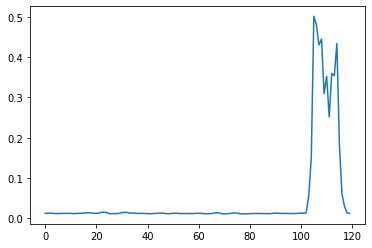

In [2]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

sys.path.append('../')
import lib.metrics
from tsdr import tsdr

# retrieved metrics
filepath = '/tmp/sockshop/metrics-b2qdj-retrievd_20210904/2021-08-18-argowf-chaos-b2qdj-user_pod-memory-hog_3.json'
data_df, _, metrics_meta = tsdr.read_metrics_json(filepath)
chaos_type = metrics_meta['injected_chaos_type']
chaos_comp = metrics_meta['chaos_injected_component']
series = data_df['s-front-end_latency'].to_numpy()
plt.plot(series)


In [3]:
series

array([0.0123, 0.0127, 0.013 , 0.0125, 0.0117, 0.0119, 0.0119, 0.0122,
       0.0122, 0.0123, 0.0121, 0.0117, 0.0119, 0.0123, 0.0126, 0.0128,
       0.0137, 0.0137, 0.0132, 0.0124, 0.0124, 0.0125, 0.015 , 0.0149,
       0.0145, 0.0115, 0.0115, 0.0117, 0.0118, 0.0124, 0.0142, 0.0148,
       0.0145, 0.013 , 0.0129, 0.0125, 0.0122, 0.0121, 0.0124, 0.0121,
       0.0116, 0.0114, 0.0119, 0.0119, 0.0126, 0.0128, 0.0128, 0.0118,
       0.0115, 0.0117, 0.0126, 0.0124, 0.0124, 0.0117, 0.012 , 0.0119,
       0.0119, 0.0117, 0.0118, 0.0124, 0.0125, 0.0123, 0.0116, 0.0114,
       0.0114, 0.0115, 0.0135, 0.0136, 0.0135, 0.0113, 0.0111, 0.0114,
       0.0116, 0.0127, 0.0131, 0.0128, 0.0116, 0.0109, 0.0111, 0.0111,
       0.0117, 0.0117, 0.0121, 0.0119, 0.012 , 0.0118, 0.0118, 0.0115,
       0.0118, 0.0123, 0.0128, 0.0125, 0.0122, 0.0119, 0.0122, 0.0119,
       0.0119, 0.0117, 0.012 , 0.0124, 0.0129, 0.0127, 0.0133, 0.0558,
       0.1504, 0.5013, 0.4801, 0.4302, 0.4447, 0.309 , 0.3522, 0.2519,
      

In [13]:
print(f"{adfuller(series)[1]:.10f}") # p_value

0.0000020054


0.0032387282


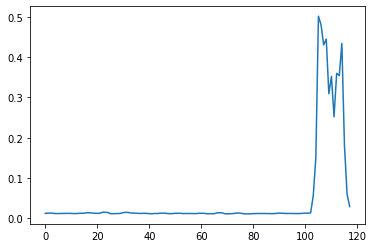

In [22]:
print(f"{adfuller(series[0:-2])[1]:.10f}") # p_value
plt.plot(series[0:-2])

0.9980800706


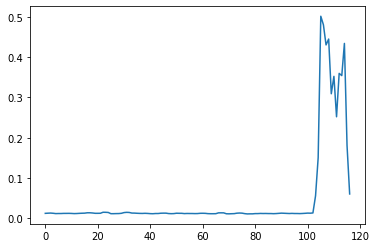

In [21]:
print(f"{adfuller(series[0:-3])[1]:.10f}") # p_value
plt.plot(series[0:-3])

In [20]:
# Try KPSS-test
import statsmodels.api as sm
print(f"{sm.tsa.kpss(series)[1]:.10f}") # p_value
# It works!

0.0822686401


In [35]:
print(f"{adfuller(series[20:])[1]:.10f}") # p_value
plt.plot(series[20:])

0.1279073458


0.0000588319


AttributeError: 'numpy.ndarray' object has no attribute 'print'

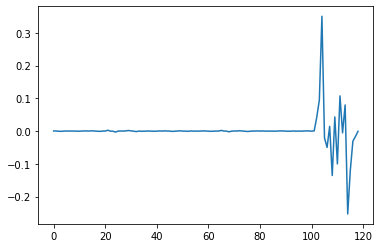

In [10]:
# first‐order differentiation
print(f"{adfuller(np.diff(series))[1]:.10f}") # p_value
plt.plot(np.diff(series))

In [7]:
# regression variants
print(f"constant only: {adfuller(series)[1]:.10f}") # p_value
print(f"constant and trend: {adfuller(series, regression='ct')[1]:.10f}") # p_value
print(f"constant, and linear and quadratic trend: {adfuller(series, regression='ctt')[1]:.10f}") # p_value
print(f"no constant, no trend: {adfuller(series, regression='nc')[1]:.10f}") # p_value

# autolag
print(f"AIC: {adfuller(series)[1]:.10f}") # p_value
print(f"BIC: {adfuller(series, autolag='BIC')[1]:.10f}") # p_value
print(f"t-stat: {adfuller(series, autolag='t-stat')[1]:.10f}") # p_value

constant only: 0.0000020054
constant and trend: 0.0000065816
constant, and linear and quadratic trend: 0.0000030062
no constant, no trend: 0.0000270454
AIC: 0.0000020054
BIC: 0.0000020054
t-stat: 0.0000020054
